# House Price Prediction

Name : Priyanka Pawar

Objective : 1. To use the dataset to train a model that can predict the price of a new house.
            2. Identifying key factors that influence house price.
            I have used MLR for Prediction & Random Forest Regression with Feature Importance Analysis for key factors.

#Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
Data=pd.read_csv("C:/Priyanka/TechnoHacks Data Science Internship/Mumbai House Prices.csv")

In [3]:
Data.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


# Exploratory Data Analysis

#Checking Dimensions of the dataset

In [4]:
Data.shape

(76038, 9)

Comment: The Dataset contains 76038 observations with 9 variables

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


#Checking for Missing Values

In [6]:
Data.isnull().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64

Comment: There are no missing observations in the dataset

In [7]:
# Converting price to a consistent unit ( Lakhs to Crores)
Data['price'] = Data.apply(lambda row: row['price'] / 100 if row['price_unit'] == 'L' else row['price'], axis=1)

In [8]:
Data.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.5000,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,0.5251,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.7300,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,0.5998,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,0.9411,L,Mira Road East,Under Construction,New


In [9]:
# Dropping the price_unit column as it's no longer needed for analysis.
Data.drop(columns=['price_unit'], inplace=True)

In [10]:
Data.head()

,bhk,type,locality,area,price,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.5000,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,0.5251,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.7300,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,0.5998,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,0.9411,Mira Road East,Under Construction,New


Comment: The price is now interpreted as,
         2.5 that is, 2 crore and 50 lacs
         0.52 that is, 52 lacs
        1.73, 1 crore 73 lacs ans so on.

# Summary Statistics

In [11]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
bhk,76038.0,2.015111,0.922754,1.0000,1.00,2.0,3.00,10.0
area,76038.0,1024.536850,670.276165,127.0000,640.00,872.0,1179.00,16000.0
price,76038.0,1.684178,2.176655,0.0449,0.64,1.1,1.94,60.0


Comment:  1. From Summary Statistics, we can see that, the average area of an apartment is around 1025 square feet, with 
             a standard deviation of 670 square feet. 
          2. The minimum area is 127 square feet and the maximum area is 16000 square feet.
          3. The average price of an apartment in the dataset is 1 crore. And the minimum price is 4 lac and the maximum price is 60 lacs

# Univariate analysis

C:\Users\Ravindra\AppData\Local\Temp\ipykernel_18008\2902965269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bhk', data=Data, palette='viridis')


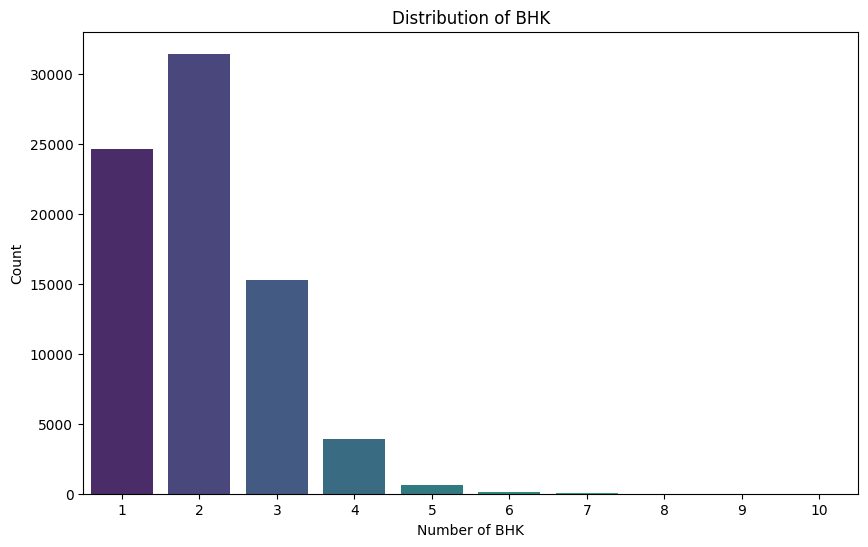

In [12]:
#  Distribution of BHK
plt.figure(figsize=(10, 6))
sns.countplot(x='bhk', data=Data, palette='viridis')
plt.title('Distribution of BHK')
plt.xlabel('Number of BHK')
plt.ylabel('Count')
plt.show()


Comment: The highest bar on the histogram is at 2 BHK, which means there are more apartments with 2 bedrooms, followed by 1BHK, 3BHK etc.

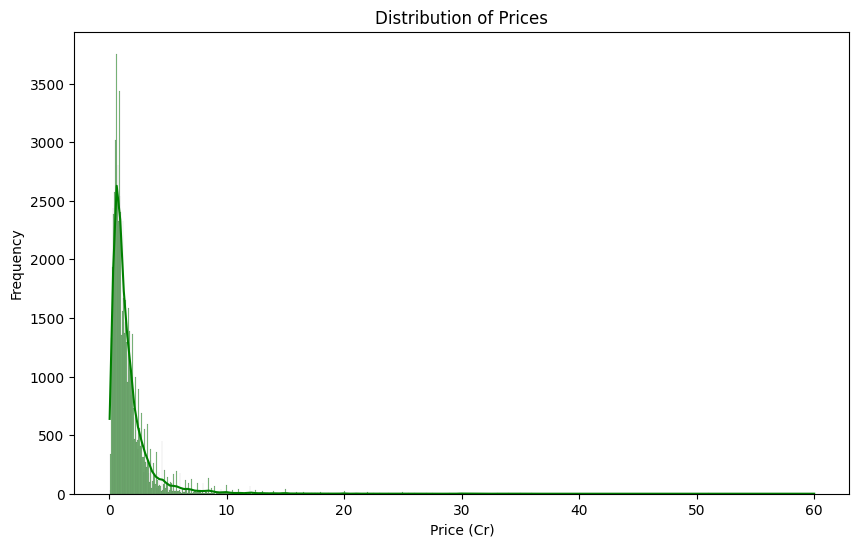

In [13]:
#Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(Data['price'], kde=True, color='green')
plt.title('Distribution of Prices')
plt.xlabel('Price (Cr)')
plt.ylabel('Frequency')
plt.show()


Comment: The distribution is skew towards the right.
         To a price range of 5-10 crores there are more apartments in this price range than any other.
         Most apartments are on an average price point.

C:\Users\Ravindra\AppData\Local\Temp\ipykernel_18008\2376091429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=Data, palette='viridis')


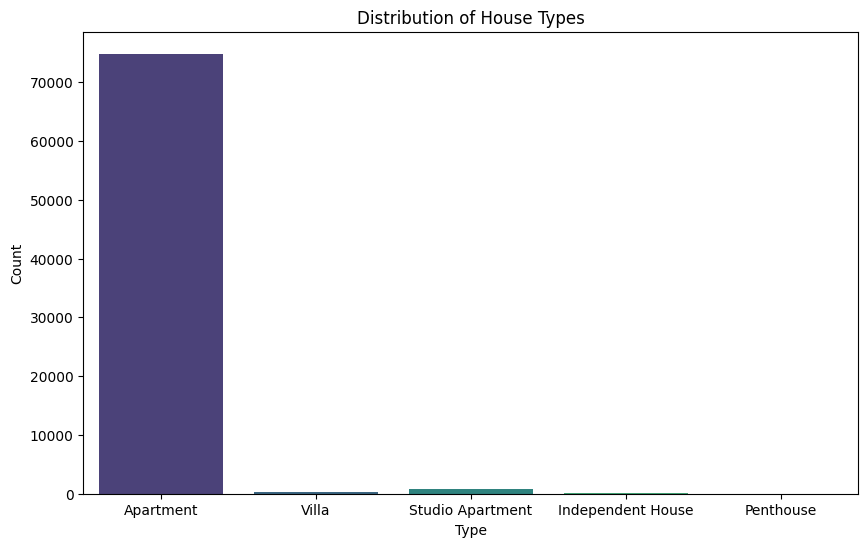

In [14]:
# Distribution of House Types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=Data, palette='viridis')
plt.title('Distribution of House Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


Comment: The dataset contains, more properties that are of Apartments.

C:\Users\Ravindra\AppData\Local\Temp\ipykernel_18008\3512339330.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df_top_12, palette='viridis', order=top_12_regions)


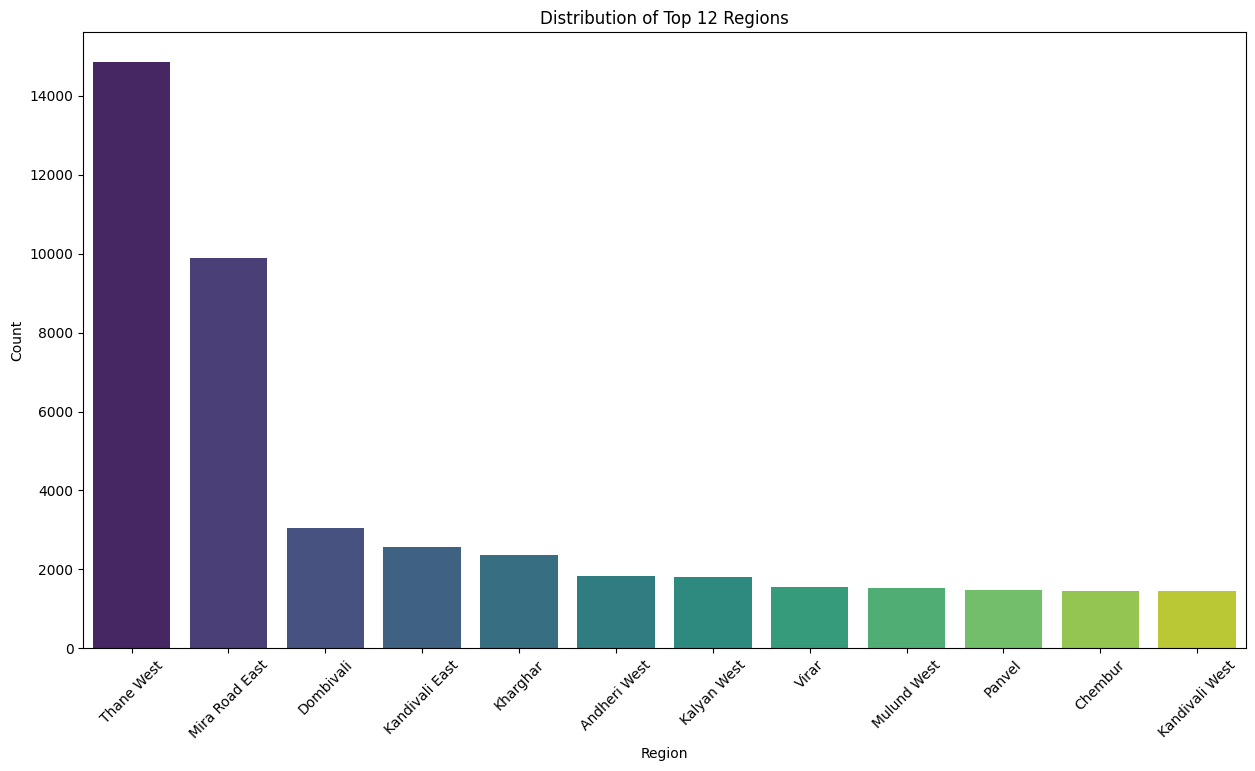

In [15]:
# Selecting only top 12 regions
top_12_regions = Data['region'].value_counts().nlargest(12).index
df_top_12 = Data[Data['region'].isin(top_12_regions)]

# Distribution of Regions (Top 12)
plt.figure(figsize=(15, 8))
sns.countplot(x='region', data=df_top_12, palette='viridis', order=top_12_regions)
plt.title('Distribution of Top 12 Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Comment : 1. According to this dataset,the above graph shows ,the regions where more number of houses are listed in those regions,
          2. Taller bars shows regions with more house listings, while shorter bars represent regions with fewer listings. 
          3.Here, Thane west, MIra road are the regions were more houses are listed, whereas, Virar, Mulund, Panvel, Kandivali 
          are the regions where less houses are listed.

C:\Users\Ravindra\AppData\Local\Temp\ipykernel_18008\3743585557.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=Data, palette='viridis')


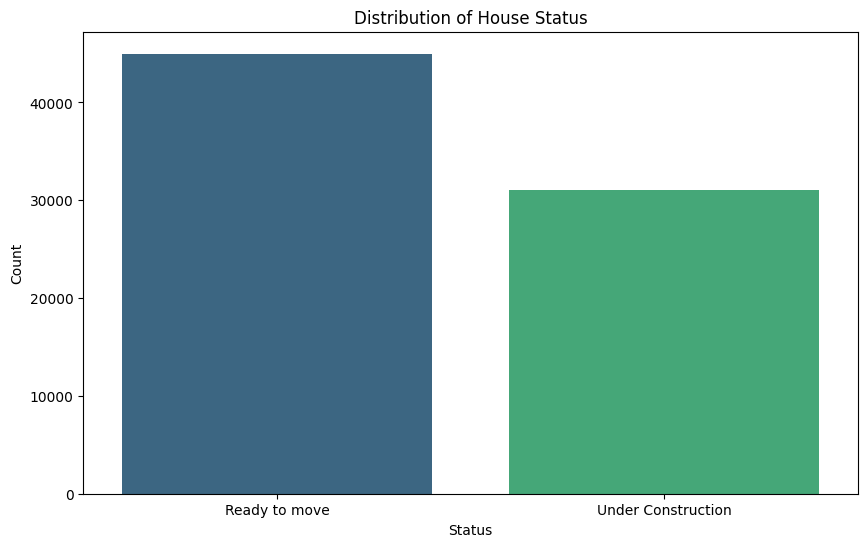

In [16]:
# Distribution of Status (Ready to move vs Under Construction)
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=Data, palette='viridis')
plt.title('Distribution of House Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


Comment: The dataset contains more of the houses which are under the staus of ready to move, while average number of houses are under construction.

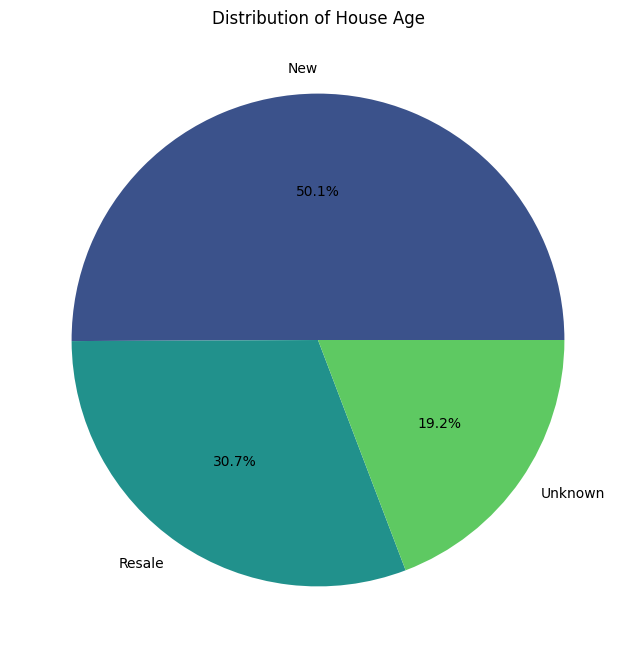

In [17]:
# Distribution of Age

# Calculating the percentage distribution of house age
age_distribution = Data['age'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(age_distribution)))
plt.title('Distribution of House Age')
plt.show()


Comment: The dataset contains  50% of the property/houses that are New, 30.7% houses those are for Resale and 19.2% houses that are unknown, 
        Unknown   here refers that, the property status is not specified whether it is new or resale. There can be various reasons for this, 
        one can be that, while listing the properties, the status was not determined properly or it could be an incomplete data entry.

# Bivariate Analysis

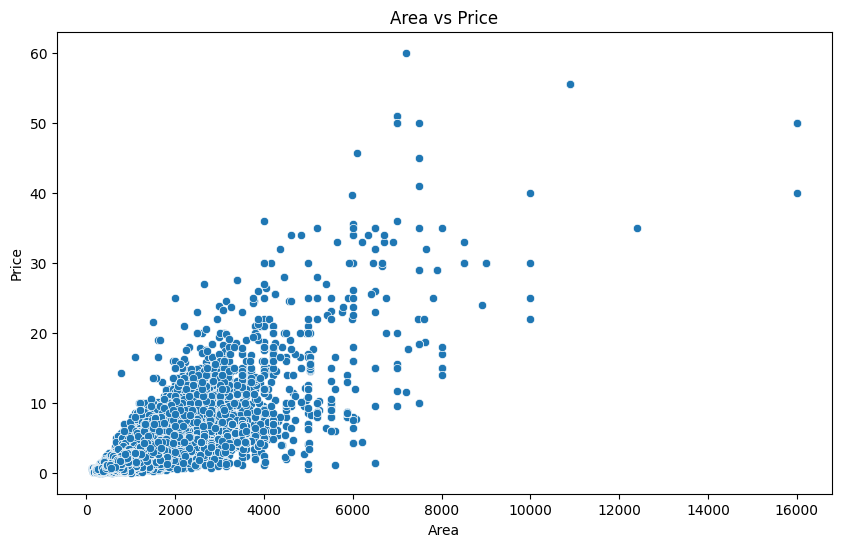

In [18]:
# Scatter plot of area vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=Data)
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Comment: 1. The above scatter plot shows a upward trend, that is a positive correlation between the area and price of a house.
         2. We can see a lot of variation in the data that is, Some  houses with less area are expensive, and some large houses are cheap. 
         3. This shows that, that there are some other factors also involved  that affects the house prices.

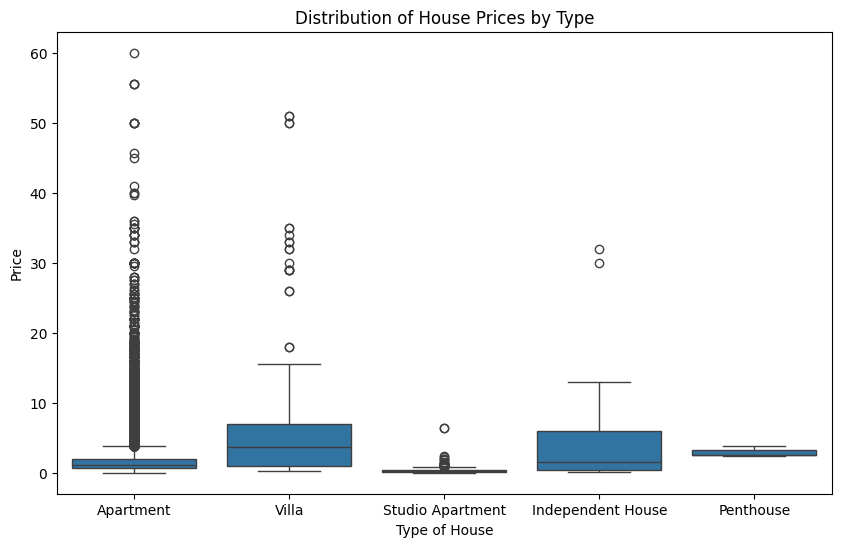

In [19]:
# Distribution of house prices based on the type of house:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='price', data=Data)
plt.title('Distribution of House Prices by Type')
plt.xlabel('Type of House')
plt.ylabel('Price')
plt.show()


Comment: 1.As we know that, the height of each box is the interquartile range (IQR).
        2. we can see that, the IQR of villas is higher on the y-axis other than the independent house and apartment, it says that villas 
        are more expensive than apartments and independent houses.
        3.The box plot says that ,there is a significant difference in price between the different house types.
        4.We cn see, there are many outliers ,it suggests that, these types sometimes have very high prices.|

C:\Users\Ravindra\AppData\Local\Temp\ipykernel_18008\348622590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='price', data=top_regions_data, estimator=np.median, palette='viridis')


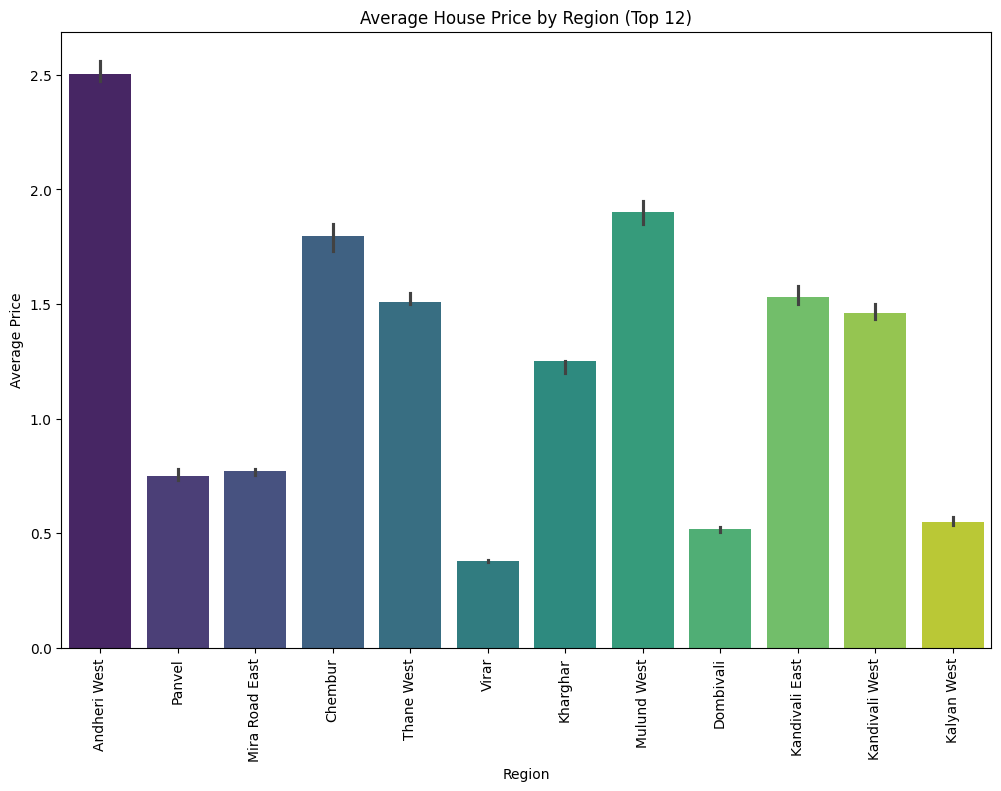

In [20]:
# Comparison of house prices in different Regions:
# Step 1: Count the occurrences of each region
top_regions = Data['region'].value_counts().nlargest(12).index

# Step 2: Filter the dataset to include only the top 12 regions
top_regions_data = Data[Data['region'].isin(top_regions)]

# Step 3: Create a bar plot for the top 12 regions
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='price', data=top_regions_data, estimator=np.median, palette='viridis')
plt.title('Average House Price by Region (Top 12)')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()



Comment: From the above graph we say that, on an average, houses in ANdheri west , Mulund west, this regions are more expensive than those in other regions.

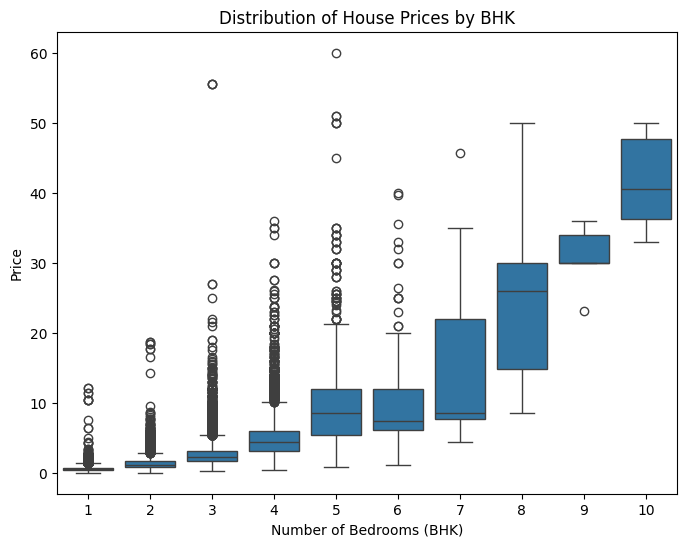

In [21]:
# Distribution of house prices based on the number of bedrooms (BHK)
plt.figure(figsize=(8, 6))
sns.boxplot(x='bhk', y='price', data=Data)
plt.title('Distribution of House Prices by BHK')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Price')
plt.show()


# INSIGHTS

# OBJECTIVES

 # 1. train a model that can predict the price of a new house.

# MULTIPLE LINEAR REGRESSION

# Data Preprocessing

In [45]:
# Converting the categorical variables into numerical using one-hot encoding(Creating Dummmy Variables)
data = pd.get_dummies(Data, columns=['type', 'status','age'])

In [46]:
data.head()

,bhk,locality,area,price,region,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,status_Ready to move,status_Under Construction,age_New,age_Resale,age_Unknown
0,3,Lak And Hanware The Residency Tower,685,2.5000,Andheri West,True,False,False,False,False,True,False,True,False,False
1,2,Radheya Sai Enclave Building No 2,640,0.5251,Naigaon East,True,False,False,False,False,False,True,True,False,False
2,2,Romell Serene,610,1.7300,Borivali West,True,False,False,False,False,False,True,True,False,False
3,2,Soundlines Codename Urban Rainforest,876,0.5998,Panvel,True,False,False,False,False,False,True,True,False,False
4,2,Origin Oriana,659,0.9411,Mira Road East,True,False,False,False,False,False,True,True,False,False


In [47]:
data.shape

(76038, 15)

In [48]:
to_drop = [ 'locality', 'region']
df = data.drop(to_drop, axis=1)  # Features

In [49]:
df.head()

,bhk,area,price,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,status_Ready to move,status_Under Construction,age_New,age_Resale,age_Unknown
0,3,685,2.5000,True,False,False,False,False,True,False,True,False,False
1,2,640,0.5251,True,False,False,False,False,False,True,True,False,False
2,2,610,1.7300,True,False,False,False,False,False,True,True,False,False
3,2,876,0.5998,True,False,False,False,False,False,True,True,False,False
4,2,659,0.9411,True,False,False,False,False,False,True,True,False,False


In [50]:
# Convert boolean columns to 1 and 0
bool_columns = ['type_Apartment', 'type_Independent House', 'type_Penthouse', 
                'type_Studio Apartment', 'type_Villa', 'status_Ready to move', 
                'status_Under Construction', 'age_New', 'age_Resale', 'age_Unknown']
df[bool_columns] = df[bool_columns].astype(int)

In [51]:
df.head()

,bhk,area,price,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,status_Ready to move,status_Under Construction,age_New,age_Resale,age_Unknown
0,3,685,2.5000,1,0,0,0,0,1,0,1,0,0
1,2,640,0.5251,1,0,0,0,0,0,1,1,0,0
2,2,610,1.7300,1,0,0,0,0,0,1,1,0,0
3,2,876,0.5998,1,0,0,0,0,0,1,1,0,0
4,2,659,0.9411,1,0,0,0,0,0,1,1,0,0


# Splitting the data into training and testing sets (80% training, 20% testing)

In [52]:
from sklearn.model_selection import train_test_split

#  columns dropped
columns_to_drop = ['price']
X = df.drop(columns_to_drop, axis=1)  # Features
y = df['price']  # Target variable

In [53]:
df.head()

,bhk,area,price,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,status_Ready to move,status_Under Construction,age_New,age_Resale,age_Unknown
0,3,685,2.5000,1,0,0,0,0,1,0,1,0,0
1,2,640,0.5251,1,0,0,0,0,0,1,1,0,0
2,2,610,1.7300,1,0,0,0,0,0,1,1,0,0
3,2,876,0.5998,1,0,0,0,0,0,1,1,0,0
4,2,659,0.9411,1,0,0,0,0,0,1,1,0,0


In [54]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Data

In [55]:
# the first few rows of the training features
print(X_train.head())

       bhk  area  type_Apartment  type_Independent House  type_Penthouse  \
58403    1   408               1                       0               0   
14402    1   830               1                       0               0   
10520    4  1652               1                       0               0   
19925    2   970               1                       0               0   
43079    3   675               1                       0               0   

       type_Studio Apartment  type_Villa  status_Ready to move  \
58403                      0           0                     0   
14402                      0           0                     0   
10520                      0           0                     1   
19925                      0           0                     1   
43079                      0           0                     0   

       status_Under Construction  age_New  age_Resale  age_Unknown  
58403                          1        1           0            0  
14402   

In [56]:
# the first few rows of the training target variable
print(y_train.head())

58403    0.6936
14402    0.6850
10520    4.9400
19925    1.8200
43079    3.4000
Name: price, dtype: float64


In [57]:
# the shape of the training features
print(X_train.shape)

# the shape of the training target variable
print(y_train.shape)


(60830, 12)
(60830,)


# Testing Data

In [58]:
# the shape of the testing features
print(X_test.shape)

# the shape of the testing target variable
print(y_test.shape)


(15208, 12)
(15208,)


Comment: The testing dataset contains 15208 observations with 12 variables.

# Training Model(Model Building)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Checking Assumptions

# Linearity check using scatter plot

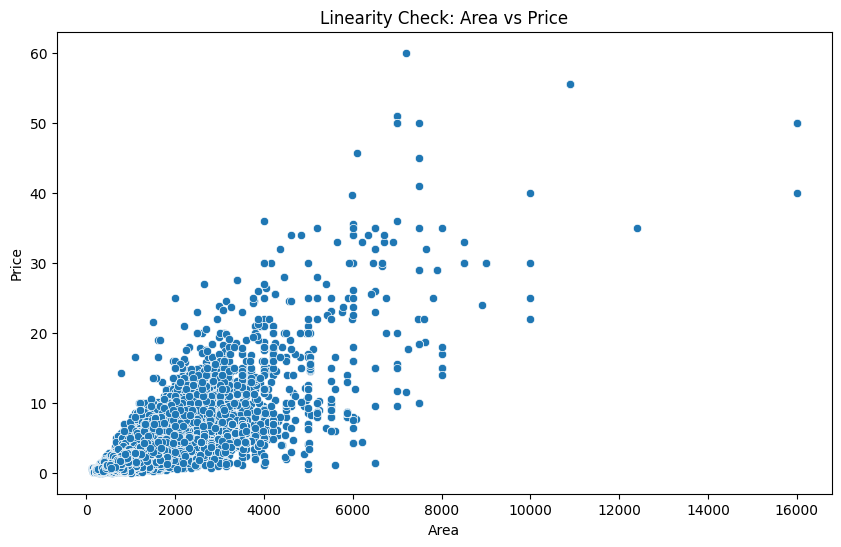

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Linearity Check: Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# Correlation test

In [62]:
correlation_matrix = df.corr()
print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
                                bhk      area     price  type_Apartment  \
bhk                        1.000000  0.787738  0.631353        0.057315   
area                       0.787738  1.000000  0.756000       -0.016388   
price                      0.631353  0.756000  1.000000       -0.015103   
type_Apartment             0.057315 -0.016388 -0.015103        1.000000   
type_Independent House     0.031707  0.056789  0.036126       -0.246483   
type_Penthouse             0.011243  0.010485  0.003797       -0.049944   
type_Studio Apartment     -0.118642 -0.102017 -0.065255       -0.861359   
type_Villa                 0.083672  0.204416  0.141712       -0.434127   
status_Ready to move       0.126253  0.234459  0.087497       -0.033837   
status_Under Construction -0.126253 -0.234459 -0.087497        0.033837   
age_New                   -0.162314 -0.244443 -0.097488        0.011647   
age_Resale                -0.054867  0.015033 -0.002421       -0.059937   
age_U

Comment:1. We know that, the correlation coefficient ranges from -1 to 1, 
        where:
         1 indicates a perfect positive linear relationship,
        -1 indicates a perfect negative linear relationship, and
         0 indicates no linear relationship.

        2. The correlation between price and area is 0.75 ,The correlation between price  and bhk is 0.63.,  that indicates a positive correlation,
           

# Autocorrelation

#we know that, The Durbin-Watson statistic ranges from 0 to 4, 
Interpretations:
2: No autocorrelation.
0 to <2: Positive autocorrelation.
>2 to 4: Negative autocorrelation.

In [63]:
# Calculating residuals on the training data
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred

In [64]:
# Performing Durbin-Watson test
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.stattools import durbin_watson

In [65]:
dw_statistic = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw_statistic)

Durbin-Watson statistic: 2.001639842642356


Comment:The Durbin-Watson statistic is 2, therefore we, conclude that there is no autocorrelation in the residuals of our regression model, that is,
        Model's residuals do not violate the assumption of no autocorrelation

# Coefficient of Determination, R-squared

In [67]:
# Evaluating the model 
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.911293385130425
R^2 Score: 0.5817647703143998


Comment: 1.we know that, R^2 represents the proportion of the variance for a dependent variable (house prices) that is explained 
         by the independent variables in the regression model. It provides insight into the goodness-of-fit of the model.
         2. 0 <R^2> 1, R² score of is approx 0.582 , it indicates that , about 58.2% of the variance in house prices can be explained by 
        the independent variables in the model. 

# Homoscadasticity/ Heteroscadasticity

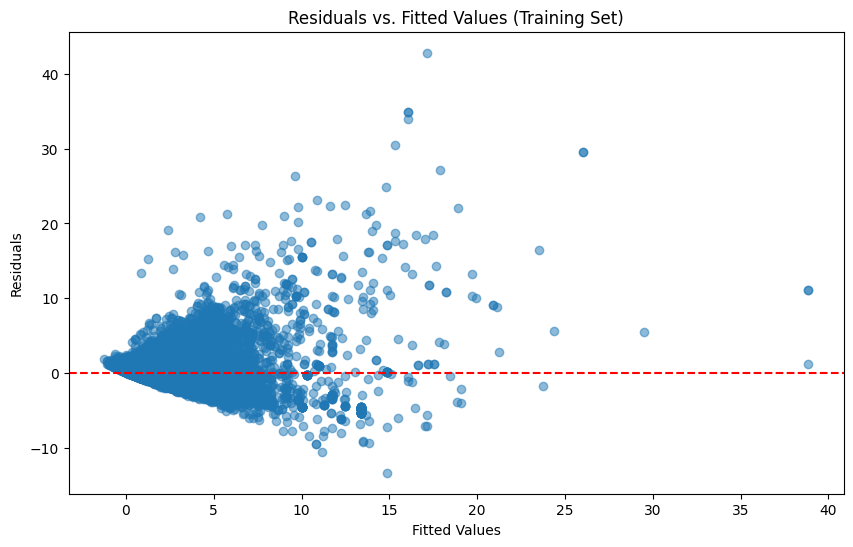

{'LM Statistic': 8288.481229022378, 'LM-Test p-value': 0.0, 'F-Statistic': 1066.0467297331895, 'F-Test p-value': 0.0}
Breusch-Pagan test p-value is less than or equal to 0.05, indicating that there is significant evidence of heteroscedasticity.


In [74]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate residuals for the training set
train_residuals = y_train - y_train_pred

# Residuals vs. fitted values plot for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values (Training Set)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Perform the Breusch-Pagan test on the training set
bp_test = sms.het_breuschpagan(train_residuals, sm.add_constant(X_train))
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

# Interpretation of the Breusch-Pagan test results
if bp_test[1] > 0.05:
    print("Breusch-Pagan test p-value is greater than 0.05, indicating that there is no significant evidence of heteroscedasticity.")
else:
    print("Breusch-Pagan test p-value is less than or equal to 0.05, indicating that there is significant evidence of heteroscedasticity.")

Comment: The Breusch-Pagan test , shows a p-value less than 0.05, that means, heteroscedasticity is in the dataset. 
         This says that, the variance of the residuals is not constant across all levels of the independent variables.

# Normality

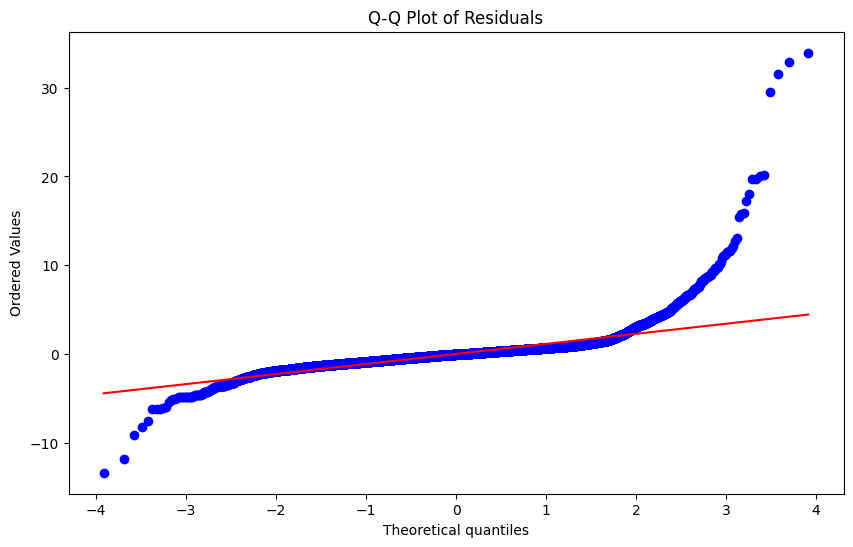

In [76]:
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculateing residuals
residuals = y_test - y_pred

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [77]:
# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')

Shapiro-Wilk test statistic: 0.6738390413072168, p-value: 6.014462202569019e-98


C:\Users\Ravindra\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15208.
  res = hypotest_fun_out(*samples, **kwds)


Comment: The p- value for the test is less than 0.05, therefore we , reject the null hypothesis and conclude that the data is not normally distributed. 

# Multicollinearity

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


C:\Users\Ravindra\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                      feature       VIF
0                         bhk  2.730798
1                        area  2.988189
2              type_Apartment       inf
3      type_Independent House       inf
4              type_Penthouse       inf
5       type_Studio Apartment       inf
6                  type_Villa       inf
7        status_Ready to move       inf
8   status_Under Construction       inf
9                     age_New       inf
10                 age_Resale       inf
11                age_Unknown       inf


Comment: The VIF values for "bhk" and "area" are less than 5, that is, they have low multicollinearity and do not significantly affect each other in the model. 

# Evaluation of the  Model

In [39]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 1.390468958815999
Test RMSE: 1.3824953472364474


Comment: RMSE values for  the training and testing sets are close to each other, this shows that, our model is performing equally on both this sets.

In [80]:
# Predicting on the test set
y_pred = model.predict(X_test)
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.911293385130425


# Retrieving the coefficients of each independent variable from  trained linear regression model. 

In [84]:
# Retrieving the intercept
intercept = model.intercept_

# Creating a DataFrame to display the coefficients along with the corresponding feature names
coefficients_df = pd.DataFrame({'Feature': ['Intercept'] + list(X.columns), 'Coefficient': [intercept] + list(coefficients)})

In [85]:
# Displaying the coefficients including the intercept
print(coefficients_df)

                      Feature  Coefficient
0                   Intercept    -1.677440
1                         bhk     0.212101
2                        area     0.002410
3              type_Apartment     0.420199
4      type_Independent House    -0.306178
5              type_Penthouse    -0.689700
6       type_Studio Apartment     0.785285
7                  type_Villa    -0.209605
8        status_Ready to move    -0.193811
9   status_Under Construction     0.193811
10                    age_New     0.181271
11                 age_Resale     0.201681
12                age_Unknown    -0.382952


Comment: The best regression model is, 
         Price= -1.677440 +0.212101×bhk +0.002410×area+ 0.420199×type_Apartment −0.306178×type_Independent House
                −0.689700×type_Penthouse+ 0.785285×type_Studio Apartment −0.209605×type_Villa −0.193811×status_Ready to move
                +0.193811×status_UnderConstruction +0.181271×age_New +0.201681×age_Resale −0.382952×age_Unknown

# House Price Prediction

From this above equation,

if the client, want to buy a house, that is of 2 bhk, 500 area, and it is an apartment, status ready to move, age new,
then, the price of the house will be, 

Price = -1.677440 + (0.212101 × 2) + (0.002410 × 500) + (0.420199 × 1) - (0.306178 × 0) - (0.689700 × 0) + (0.785285 × 0) - (0.209605 × 0) - (0.193811 × 1) + (0.193811 × 0) + (0.181271 × 1) + (0.201681 × 0) - (0.382952 × 0)

Price ≈ 0.553232

Hence, the predicted price of the house is approximately 0.553232, that is, 55.3232 lacs.

 # 2. Identifying key factors that influence house price.

# Random Forest Regression for Feature Importance

In [86]:
# Training the Model
from sklearn.ensemble import RandomForestRegressor

# Training the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting
y_rf_pred = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print(f'Mean Squared Error: {mse_rf}')
print(f'R^2 Score: {r2_rf}')


Mean Squared Error: 1.3997994966271843
R^2 Score: 0.693691471680729


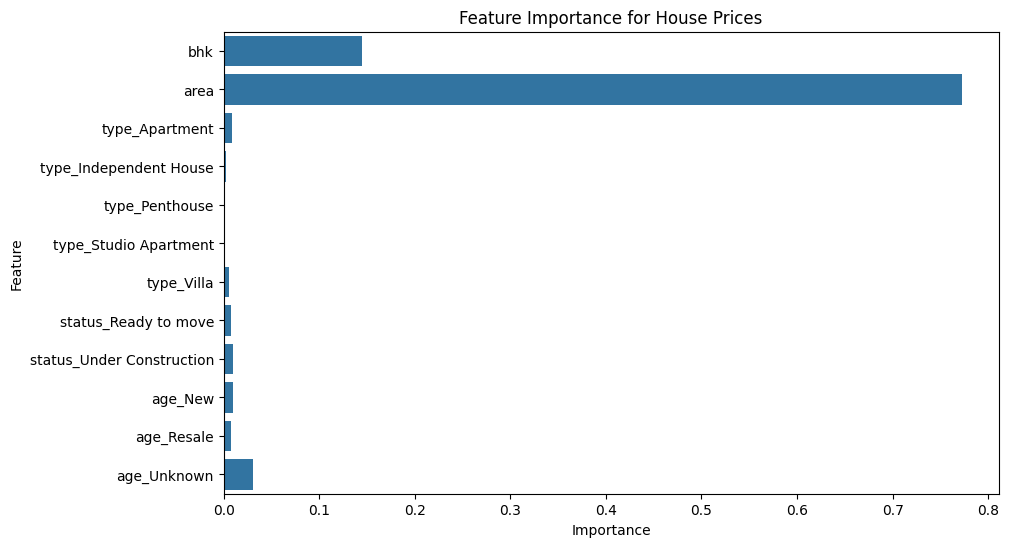

In [87]:
# Feature Importance Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for House Prices')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Comment: According to this Dataset,
         The bar chart ,that shows, the most important feature for predicting house prices is the "area" of the house, and the "bhk".
         Other features have  smaller importance compared to these two.
          This implies that the size and number of bedrooms are the most influential factors in determining house prices in the model.

# House Price Prediction


In [93]:
import pandas as pd

# Create a dictionary with the new house features
new_house_features = {
    'bhk': 2,
    'area': 500,
    'type_Apartment': 1,
    'type_Independent House': 0,
    'type_Penthouse': 0,
    'type_Studio Apartment': 0,
    'type_Villa': 0,
    'status_Ready to move': 1,
    'status_Under Construction': 0,
    'age_New': 1,
    'age_Resale': 0,
    'age_Unknown': 0
}

# Create a DataFrame from the dictionary
X_new = pd.DataFrame([new_house_features])


In [95]:
predicted_price = rf_model.predict(X_new)

In [97]:
print(predicted_price)

[1.07530616]


Comment: From this above random forest model,

if the client, want to buy a house, that is of 2 bhk, 500 area, and it is an apartment, status ready to move, age new,
then, the price of the house will be, 

 Hence, the predicted price of the house is approximately 1.08 crores 

# Conclusion

1. In a Random Forest model, we don't have coefficients like in linear regression. 
   Instead, we  use feature importance to understand the contribution of each independent variable to the prediction.
2. Multiple Linear Regression: Provides a clear and interpretable model for predicting house prices. And is useful for understanding the linear relationship between predictors and price. Where as, we saw in,
Random Forest Regression: it Offers robust prediction performance and helps identify key factors influencing house prices through feature importance analysis.
3. Hence, the Random Forest model outperforms the Multiple Linear Regression model in terms of predictive accuracy.
4. We see that, the Mean Squared Error (MSE) of the Random Forest model is lower (1.3998) compared to that of the Multiple Linear Regression model (1.9113), this indicates that, the Random Forest model produces predictions that are closer to the actual values.
5. Also,  the R^2 score of the Random Forest model (0.6937) is higher than that of the Multiple Linear Regression model (0.5818),
   this shows that,the Random Forest model explains more of the variance in the target variable.
6. Therefore, the Random Forest model is preferred for predicting house prices in this dataset.